# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [3]:
!pip install palmerpenguins
from palmerpenguins import load_penguins

In [4]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


We would need to dummify the 'species', 'island', 'sex' variables. We could make 'year' into a dummy variable, but it's only from 2007-2010, so probably leaving it as numerical will be the best call.

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [5]:
# From checking the first 5 lines, there were definitely NA values, but checking anyway
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [6]:
# Dropping NA values
penguins = penguins.dropna(subset=['bill_length_mm', 'bill_depth_mm'])

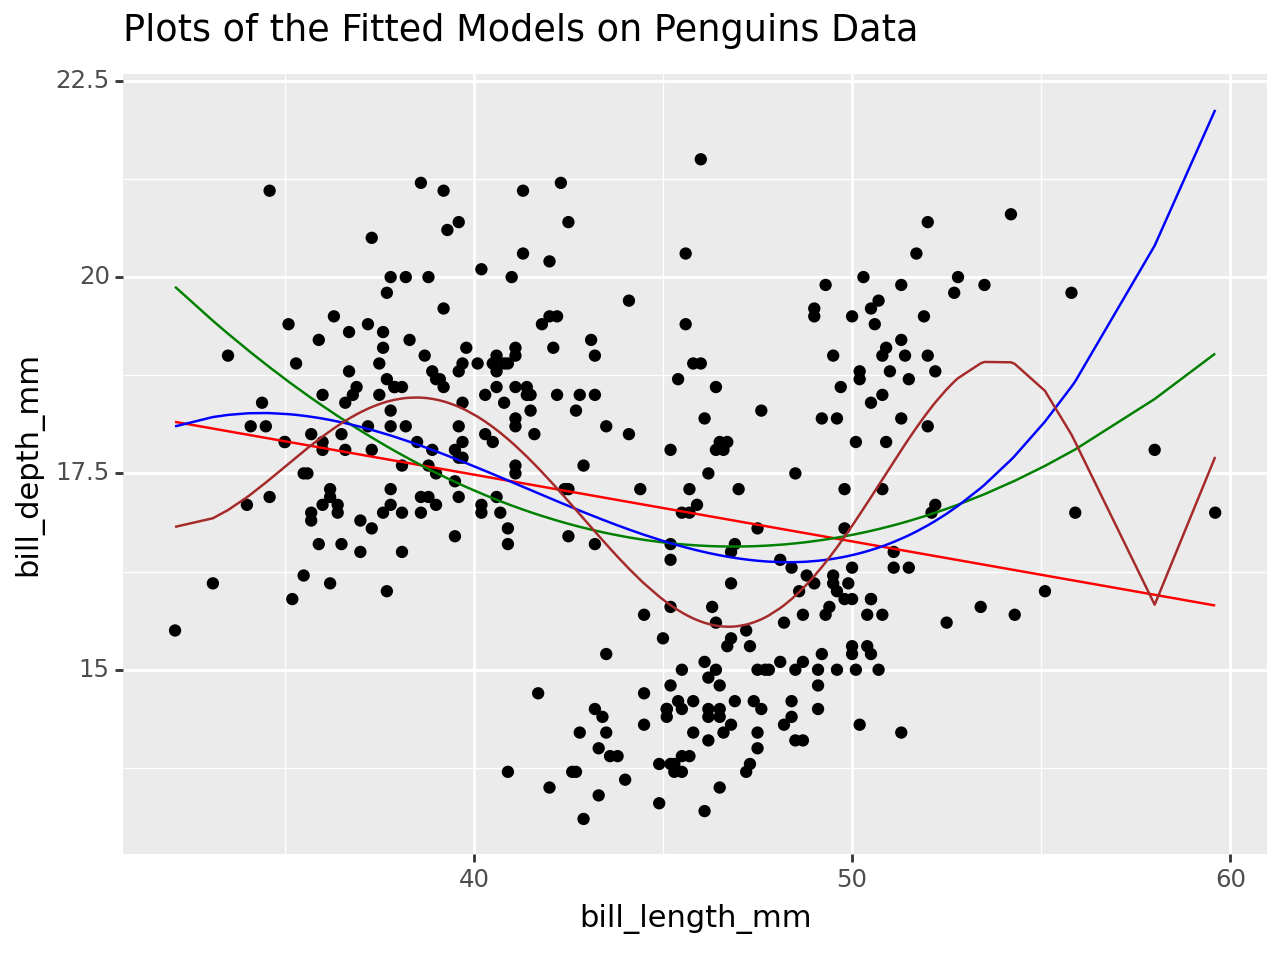

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from plotnine import ggplot, aes, geom_point, geom_line, labs

# Reshaping the X variable to 2D for sklearn
X = penguins['bill_length_mm'].values.reshape(-1, 1)
y = penguins['bill_depth_mm']

# Simple linear regression model
lr = LinearRegression()
lr.fit(X, y)
penguins['y_pred_lin'] = lr.predict(X)

# Quadratic regression model
poly_degrees_2 = PolynomialFeatures(degree=(1,2), include_bias=False)
X_poly_2 = poly_degrees_2.fit_transform(X)
lr.fit(X_poly_2, y)
penguins['y_pred_poly_2'] = lr.predict(X_poly_2)

# Cubic regression model
poly_degrees_3 = PolynomialFeatures(degree=(1,3), include_bias=False)
X_poly_3 = poly_degrees_3.fit_transform(X)
lr.fit(X_poly_3, y)
penguins['y_pred_poly_3'] = lr.predict(X_poly_3)

# Degree 10 polynomial regression model
poly_degrees_10 = PolynomialFeatures(degree=(1,10), include_bias=False)
X_poly_10 = poly_degrees_10.fit_transform(X)
lr.fit(X_poly_10, y)
penguins['y_pred_poly_10'] = lr.predict(X_poly_10)

# Plotting
plot = (ggplot(penguins, aes(x='bill_length_mm', y='bill_depth_mm')) +
        geom_point(color='black') +
        geom_line(aes(y='y_pred_lin'), color='red') +
        geom_line(aes(y='y_pred_poly_2'), color='green') +
        geom_line(aes(y='y_pred_poly_3'), color='blue') +
        geom_line(aes(y='y_pred_poly_10'), color='brown') +
        labs(title='Plots of the Fitted Models on Penguins Data'))

print(plot)

In [8]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,y_pred_lin,y_pred_poly_2,y_pred_poly_3,y_pred_poly_10
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,17.561136,17.484121,17.763289,18.429546
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,17.527128,17.392292,17.688565,18.367980
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,17.459111,17.223194,17.532171,18.159955
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,17.765187,18.136996,18.128998,18.197927
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,17.544132,17.437600,17.726273,18.402426


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?



*   The simple linear model seems to be underfitting the data because it is not capturing the trend of the points accurately.
*   The degree 10 polynomial model is overfitting the data, because it is trying to capture all the data points and is fitting the training data too perfectly, which will perform poorly on predicting new values.
*   The cubic model or quadratic model is the best choice, because they are both following the trend the best without over or under fitting.

